In [22]:
#Importations
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

#Board Game Info
Boardgame_path = "Board-Games_Group-F-PlayerCountList.csv"

#Read the CSV
Boardgame_df = pd.read_csv(Boardgame_path)

In [23]:
Totalgames = len(Boardgame_df)
Single_player_df = Boardgame_df[Boardgame_df['min_players'] == 1.0]
Totalsingleplayer = len(Single_player_df)
Single_player_df

,Unnamed: 0,id,name,year_published,min_players,max_players,primary_publisher,mechanics,num_user_ratings,average_user_rating,rank,num_mechs
8,8,VNDvLYnE5o,Chrononauts,2000,1.0,6.0,Looney Labs,"[{'id': 'WPytek5P8l', 'url': 'https://www.boar...",42,2.857143,911,3
24,24,aSIC1If5lf,People Power,2000,1.0,3.0,GMT Games,"[{'id': 'cznlFNKPA0', 'url': 'https://www.boar...",1,0.000000,9999999,2
27,27,UXmJW11uqk,Buffy the Vampire Slayer,2000,1.0,6.0,Jasco Games,"[{'id': 'GNtouC8NLm', 'url': 'https://www.boar...",11,3.272727,9999999,4
51,51,9UAIXY90SI,Numero,2000,1.0,3.0,NaN,[],0,0.000000,9999999,0
92,92,Dz1VkpwmuI,Think: Logic Logo Trainer,2000,1.0,4.0,NaN,"[{'id': 'ebJKldFVeS', 'url': 'https://www.boar...",0,0.000000,9999999,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1986,ye6eL4ZtQp,Rurik: Dawn of Kiev,2019,1.0,4.0,PieceKeeper Games,"[{'id': '05zCZoLvQJ', 'url': 'https://www.boar...",12,3.750000,9999999,4
1990,1990,qTl7hcj1nu,Tiny Epic Tactics,2019,1.0,4.0,Gamelyn Games,"[{'id': '9mNukNBxfZ', 'url': 'https://www.boar...",10,3.800000,9999999,4
1991,1991,GGvHuT0Kk7,Ragusa,2019,1.0,5.0,NaN,"[{'id': 'AVY6EvSQTP', 'url': 'https://www.boar...",15,3.133333,9999999,2
1992,1992,BEl5GIjyqZ,Project L,2019,1.0,4.0,Boardcubator,"[{'id': 'oeg6wN9Eoc', 'url': 'https://www.boar...",2,0.000000,9999999,4


In [24]:
#Singledescription = Single_player_df.groupby('year_published')

In [25]:
ProtoLetstrythis = pd.DataFrame(Single_player_df['year_published'].value_counts(sort = False).reset_index())
Letstrythis = ProtoLetstrythis.rename(columns = {'year_published':'Minimum One Player Games %'})
Letstrythis['Other Minimum Player Count Games %'] = [95,96,94,91,96,94,94,93,89,84,81,84,80,79,82,75,67,58,57,58]
Letstrythis

,index,Minimum One Player Games %,Other Minimum Player Count Games %
0,2000,5,95
1,2001,4,96
2,2002,6,94
3,2003,9,91
4,2004,4,96
5,2005,6,94
6,2006,6,94
7,2007,7,93
8,2008,11,89
9,2009,16,84


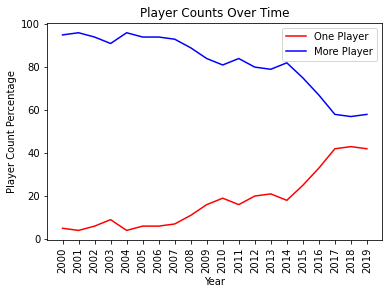

In [26]:
Years = Letstrythis['index']
Counts = Letstrythis['Minimum One Player Games %']
MorePlayerCounts = Letstrythis['Other Minimum Player Count Games %']
OnePlayer = plt.plot(Years, Counts, color="red", label="One Player")
MorePlayer = plt.plot(Years, MorePlayerCounts, color="blue", label="More Player")
plt.title("Player Counts Over Time")
plt.xlabel("Year")
plt.ylabel("Player Count Percentage")
plt.legend()
plt.xticks(Years, rotation = 'vertical')
plt.show()

The R value is : 0.9244623808367741.


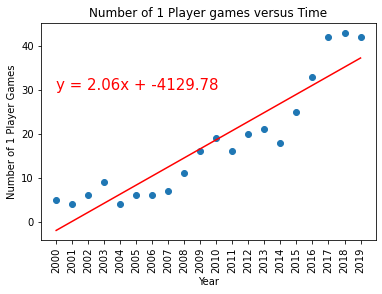

In [27]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Years, Counts)
regress_values = Years * slope + intercept
line_eq = "y = " + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(Years, Counts)
plt.plot(Years, regress_values, "r-")
plt.title('Number of 1 Player games versus Time')
plt.xlabel('Year')
plt.ylabel('Number of 1 Player Games')
plt.xticks(Years, rotation = 'vertical')
plt.annotate(line_eq, (2000,30), fontsize=15, color='red')
print(f"The R value is : {rvalue}.")
plt.savefig('Images/One Player Game Scatter Plot')

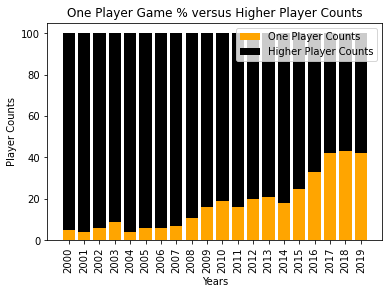

In [29]:
plt.bar(Years, Counts, color = 'Orange', label = 'One Player Counts')
plt.bar(Years, MorePlayerCounts, bottom = Counts, color = 'black', label = 'Higher Player Counts')
plt.xticks(Years, rotation = 'vertical')
plt.title('One Player Game % versus Higher Player Counts')
plt.xlabel('Years')
plt.ylabel('Player Counts')
plt.legend(loc = 'best')
plt.show
plt.savefig('Images/One Player Stacked Bar')